In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


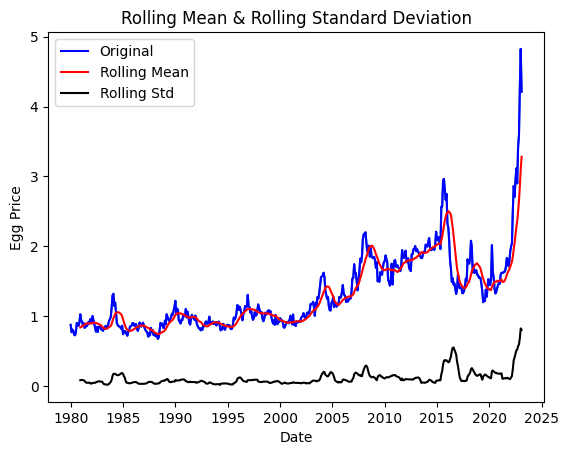

ADF Statistic: 0.06815439098143822
p-value: 0.9638183735551045
Critical Values:
	1%: -3.44336554668393
	5%: -2.867280279529963
	10%: -2.5698273512400744


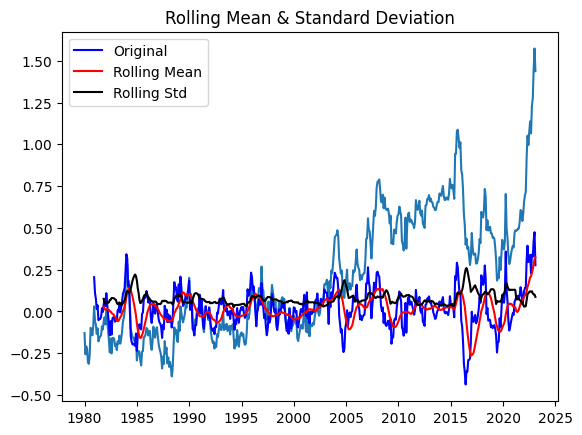

ADF Statistic: -6.294592532889852
p-value: 3.5311965475481175e-08
Critical Values:
	1%: -3.4436840273842058
	5%: -2.8674204319994674
	10%: -2.5699020441557052


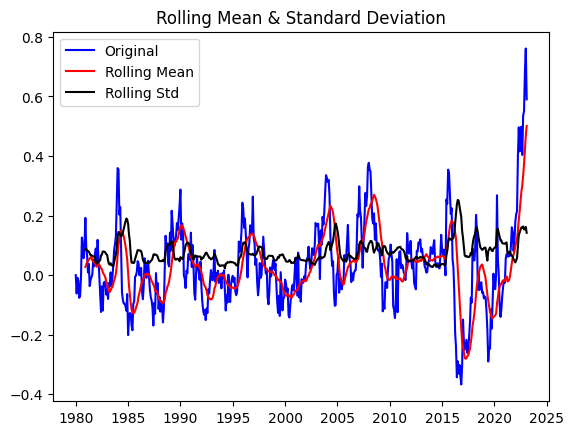

ADF Statistic: -4.327685797172063
p-value: 0.00039764930906616315
Critical Values:
	1%: -3.443391504492468
	5%: -2.8672917032172953
	10%: -2.5698334393109095


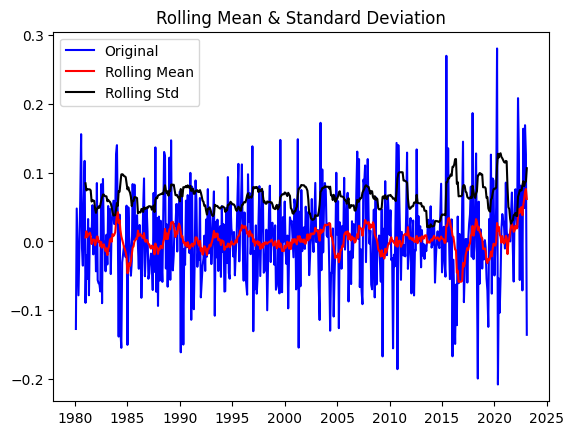

ADF Statistic: -5.948071800651991
p-value: 2.180084643356565e-07
Critical Values:
	1%: -3.4435228622952065
	5%: -2.867349510566146
	10%: -2.569864247011056


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


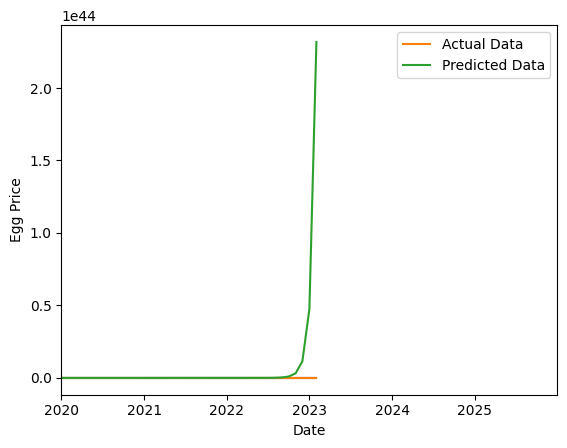

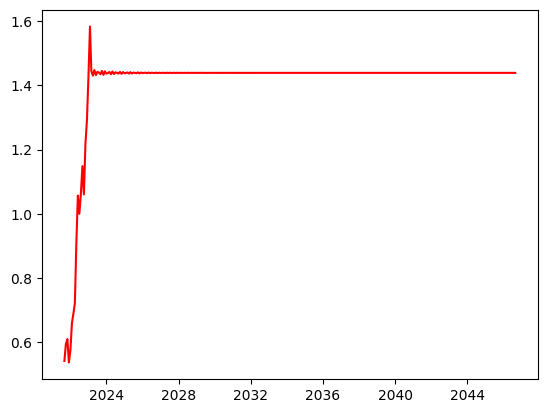

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('/content/drive/MyDrive/The Eggcellent Predictor /Data/fredusa.csv', parse_dates = ['DATE'], index_col = ['DATE'])

df.head()
plt.xlabel('Date')
plt.ylabel('Egg Price')
plt.plot(df)

rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = adfuller(df['APU0000708111'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

df_log = np.log(df)
plt.plot(df_log)

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['APU0000708111'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['APU0000708111'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Plot the original data and the predictions
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2025-12-31'))
plt.plot(df, label='Actual Data')
plt.plot(predictions_ARIMA, label='Predicted Data')

# Set the labels for the x and y axis
plt.xlabel('Date')
plt.ylabel('Egg Price')

# Show the legend
plt.legend()

# Show the plot
plt.show()


preds = results.predict(start=500, end=800)
#plt.plot(df_log)
plt.plot(preds, color='red')
plt.show()


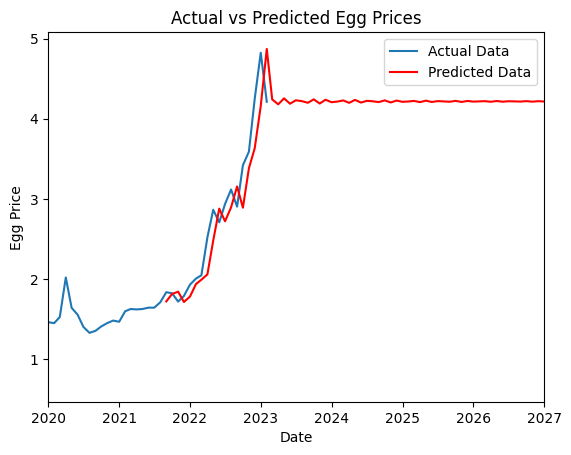

In [6]:
# Take the exponent of the predicted values to revert back to the original scale
preds_exp = np.exp(preds)

# Plot the actual data and the predicted values
plt.plot(df, label='Actual Data')
plt.plot(preds_exp, color='red', label='Predicted Data')

# Set plot title and axes labels
plt.title('Actual vs Predicted Egg Prices')
plt.xlabel('Date')
plt.ylabel('Egg Price')

# Show legend and plot the figure
plt.legend()
# Set x-axis limits to zoom in
plt.xlim(['01-01-2020', '01-01-2027'])


plt.show()


